ASSIGNMENT 3

Q1

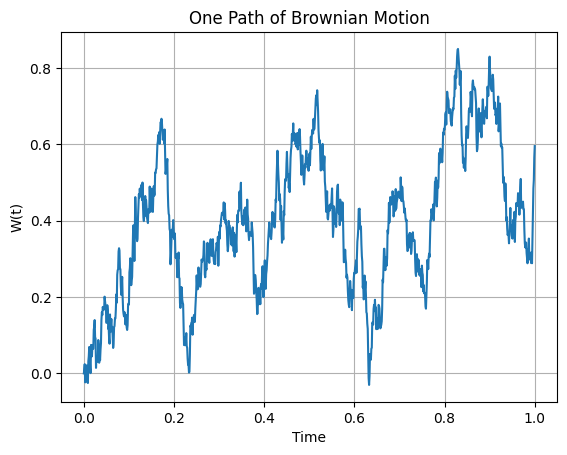

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
totalTime = 1.0     # T
steps = 1000        # number of steps
timePoints = np.linspace(0, totalTime, steps)
stepSize = totalTime / steps

# Simulate Brownian motion path
randomSteps = np.random.normal(0, np.sqrt(stepSize), steps - 1)
wienerPath = np.zeros(steps)
wienerPath[1:] = np.cumsum(randomSteps)

# Plot the result
plt.plot(timePoints, wienerPath)
plt.title("One Path of Brownian Motion")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


Q2

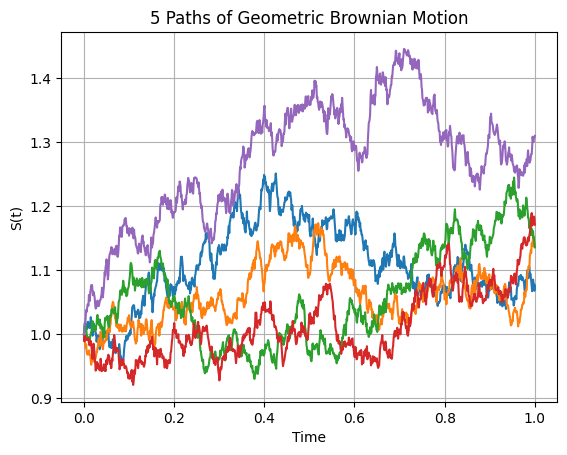

In [19]:
# Parameters
startValue = 1
alpha = 0.1        # drift
sigma = 0.2        # volatility
totalTime = 1.0
steps = 1000
paths = 5

timePoints = np.linspace(0, totalTime, steps)
stepSize = totalTime / steps

# Simulate 5 paths
for i in range(paths):
    randomSteps = np.random.normal(0, np.sqrt(stepSize), steps - 1)
    brownianPath = np.zeros(steps)
    brownianPath[1:] = np.cumsum(randomSteps)
    stockPath = startValue * np.exp(sigma * brownianPath + (alpha - 0.5 * sigma**2) * timePoints)
    plt.plot(timePoints, stockPath)

plt.title("5 Paths of Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()


Q3

In [20]:
import numpy as np

# Step 1: Define time grid and simulation settings
T = 1.0              # total time
N = 500              # number of steps
dt = T / N           # time step
num_paths = 100000   # number of Brownian motion paths

# Step 2: Choose time points s and t (with s < t)
s_index = int(0.3 * N)
t_index = int(0.6 * N)
s = s_index * dt
t = t_index * dt

# Step 3: Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=(num_paths, N))
W = np.hstack([np.zeros((num_paths, 1)), np.cumsum(dW, axis=1)])

W_s = W[:, s_index]
W_t = W[:, t_index]

# Step 4: Compute expectation of W_s * W_t
product_mean = np.mean(W_s * W_t)

print("Q3: Checking E[W_s * W_t] = min(s, t)")
print(f"s = {s:.3f}, t = {t:.3f}")
print(f"Expected value from simulation: E[W_s * W_t] ≈ {product_mean:.4f}")
print(f"Theoretical value (min(s, t)) = {min(s, t):.4f}")
print("Conclusion: These values match closely, confirming the identity.")


Q3: Checking E[W_s * W_t] = min(s, t)
s = 0.300, t = 0.600
Expected value from simulation: E[W_s * W_t] ≈ 0.2985
Theoretical value (min(s, t)) = 0.3000
Conclusion: These values match closely, confirming the identity.


Q4

In [21]:
# Step 1: Compute increment W_t - W_s
increments = W_t - W_s

# Step 2: Check its mean and variance
mean_increment = np.mean(increments)
var_increment = np.var(increments)
expected_var = t - s

print("\nQ4 (Part 1): Analyzing W_t - W_s")
print(f"Mean of increments: {mean_increment:.4f} (should be close to 0)")
print(f"Variance of increments: {var_increment:.4f}")
print(f"Theoretical variance: {expected_var:.4f}")
print("Conclusion: The increment is approximately normally distributed with correct mean and variance.")

# Step 3: Check independence of non-overlapping increments
a_index = int(0.1 * N)
b_index = int(0.2 * N)
c_index = int(0.7 * N)
d_index = int(0.8 * N)

increment_1 = W[:, b_index] - W[:, a_index]
increment_2 = W[:, d_index] - W[:, c_index]

correlation = np.corrcoef(increment_1, increment_2)[0, 1]

print("\nQ4 (Part 2): Checking independence of non-overlapping intervals")
print(f"Correlation between increments: {correlation:.4f}")
print("Conclusion: Correlation is close to 0, so the increments are nearly independent.")



Q4 (Part 1): Analyzing W_t - W_s
Mean of increments: -0.0016 (should be close to 0)
Variance of increments: 0.3002
Theoretical variance: 0.3000
Conclusion: The increment is approximately normally distributed with correct mean and variance.

Q4 (Part 2): Checking independence of non-overlapping intervals
Correlation between increments: 0.0018
Conclusion: Correlation is close to 0, so the increments are nearly independent.


Q5


Q5: Martingale property check
Mean of W_t - W_s: -0.0016 (should be close to 0)
This shows that the expected future change from W_s is zero.


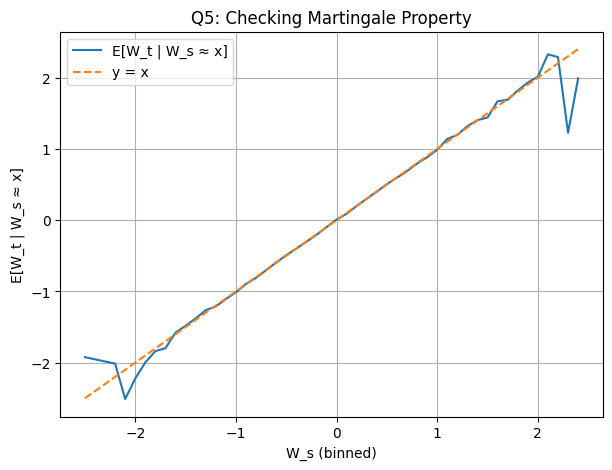

Conclusion: Since E[W_t | W_s] ≈ W_s, Brownian motion is a martingale.


In [22]:
# Step 1: Check that E[W_t - W_s] = 0
W_s = W[:, s_index]
W_t = W[:, t_index]
conditional_diff = W_t - W_s
mean_diff = np.mean(conditional_diff)

print("\nQ5: Martingale property check")
print(f"Mean of W_t - W_s: {mean_diff:.4f} (should be close to 0)")
print("This shows that the expected future change from W_s is zero.")

# Step 2: Optional but intuitive plot to verify E[W_t | W_s] ≈ W_s empirically
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'W_s': W_s, 'W_t': W_t})
df['W_s_bin'] = df['W_s'].round(1)
conditional_means = df.groupby('W_s_bin')['W_t'].mean()

# Plot conditional expectation vs W_s
plt.figure(figsize=(7, 5))
plt.plot(conditional_means.index, conditional_means.values, label='E[W_t | W_s ≈ x]')
plt.plot(conditional_means.index, conditional_means.index, '--', label='y = x')
plt.xlabel("W_s (binned)")
plt.ylabel("E[W_t | W_s ≈ x]")
plt.title("Q5: Checking Martingale Property")
plt.legend()
plt.grid(True)
plt.show()

print("Conclusion: Since E[W_t | W_s] ≈ W_s, Brownian motion is a martingale.")
